In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv("College_Admission_updated.csv")
df

student_id  age  gender category           state preferred_stream  \
0          250.99   17   other  general          odisha       management   
1          250.99   20   other      ews         gujarat      agriculture   
2          250.99   19  female       sc   uttar pradesh         pharmacy   
3          250.99   18    male      ews       meghalaya             arts   
4          250.99   18    male       sc       rajasthan      engineering   
...           ...  ...     ...      ...             ...              ...   
24995    24750.01   18  female      obc   uttar pradesh              law   
24996    24750.01   20   other      ews  andhra pradesh       management   
24997    24750.01   17    male      obc         manipur         pharmacy   
24998    24750.01   19    male      ews  andhra pradesh       management   
24999    24750.01   17  female      ews         tripura          nursing   

      entrance_exam  entrance_score  board_percentage  extracurricular_score  \
0               cet              30             95.58                      2   
1              none               0             75.45                      2   
2               cet             120             75.36                     10   
3               cet             179             52.49                      2   
4               jee             295             92.48                      7   
...             ...             ...               ...                    ...   
24995          none               0             82.67                      2   
24996          none               0             60.66                     10   
24997           cet             195             91.87                      6   
24998           cet              66             50.44                      9   
24999          none               0             87.93                      4   

       admission_probability admission_status scholarship_eligibility  \
0                      0.387         admitted                     yes   
1                      0.221         rejected                      no   
2                      0.446         rejected                      no   
3                      0.174         admitted                      no   
4                      0.634         admitted                     yes   
...                      ...              ...                     ...   
24995                  0.273         rejected                      no   
24996                  0.258         rejected                      no   
24997                  0.544         rejected                      no   
24998                  0.209         rejected                      no   
24999                  0.348         rejected                      no   

                            college_name       city  
0      Bangalore Institute of Technology  Bangalore  
1      Bangalore Institute of Technology  Bangalore  
2                             NIT Trichy    Unknown  
3                             NIT Trichy    Unknown  
4                 Symbiosis College Pune       Pune  
...                                  ...        ...  
24995             Symbiosis College Pune       Pune  
24996             Symbiosis College Pune       Pune  
24997         MIT World Peace University    Unknown  
24998                   Delhi University      Delhi  
24999             Symbiosis College Pune       Pune  

[25000 rows x 15 columns]

In [3]:
import os
print(os.getcwd())


c:\Users\AADITI\Downloads\University_Admission_Prediction (1)\University_Admission_Prediction\Notebooks


In [4]:
import pandas as pd
from pathlib import Path

def load_data(filepath):
    """
    Load the dataset from a CSV file
    """
    filepath = Path(filepath).resolve()
    df = pd.read_csv(filepath)
    return df




In [5]:
from pathlib import Path
from scripts.data_preprocessing import preprocess_data

DATA_PATH = Path(
    r"C:\Users\AADITI\Downloads\University_Admission_Prediction (1)\University_Admission_Prediction\data_1\College_Admission.csv"
)

X, y = preprocess_data(
    filepath=DATA_PATH,
    target_column="admission_probability"
)



In [6]:
from pathlib import Path

def load_data(filepath):
    filepath = Path(filepath).resolve()
    assert filepath.exists(), f"File not found: {filepath}"
    return pd.read_csv(filepath)


In [7]:
print(DATA_PATH)
print(DATA_PATH.exists())


C:\Users\AADITI\Downloads\University_Admission_Prediction (1)\University_Admission_Prediction\data_1\College_Admission.csv
True


In [8]:
import os
print("Current working directory:")
print(os.getcwd())


Current working directory:
c:\Users\AADITI\Downloads\University_Admission_Prediction (1)\University_Admission_Prediction\Notebooks


In [9]:
df.describe()

student_id           age  entrance_score  board_percentage  \
count  25000.000000  25000.000000    25000.000000      25000.000000   
mean   12500.500000     18.492440       77.879760         75.028014   
std     7212.732314      1.116205      120.356125         14.438767   
min      250.990000     17.000000        0.000000         50.440000   
25%     6250.750000     17.000000        0.000000         62.550000   
50%    12500.500000     18.000000       20.000000         75.070000   
75%    18750.250000     19.000000      126.000000         87.640000   
max    24750.010000     20.000000      634.000000         99.530000   

       extracurricular_score  admission_probability  
count           25000.000000           25000.000000  
mean                4.990920               0.323997  
std                 3.158942               0.142427  
min                 0.000000               0.041990  
25%                 2.000000               0.219000  
50%                 5.000000               0.319000  
75%                 8.000000               0.419000  
max                10.000000               0.731010

In [10]:
X.to_csv("models/training_columns.csv", index=False)


In [11]:
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()

# Fit on training data
X_scaled = scaler.fit_transform(X)

# Save the scaler
with open("models/scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)



In [12]:
import os
os.listdir("models")


['regression_model.pkl', 'scaler.pkl', 'training_columns.csv']

In [13]:
with open("models/scaler.pkl", "rb") as file:
    scaler = pickle.load(file)


In [14]:
training_columns = pd.read_csv("models/training_columns.csv").columns.tolist()


<Axes: >

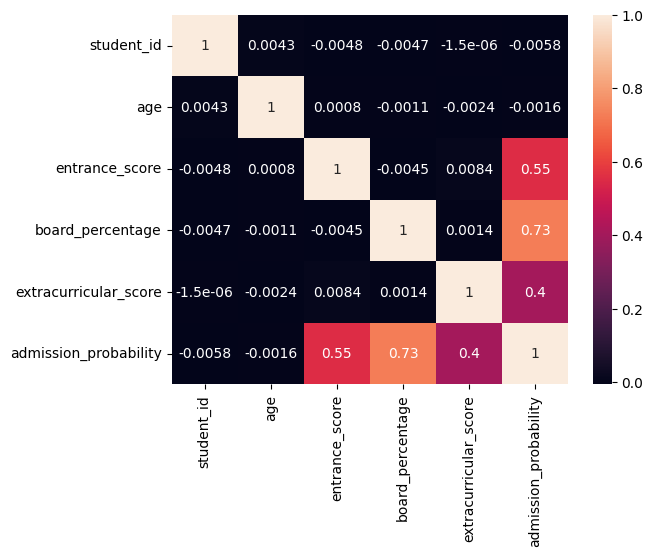

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [16]:
df.fillna(df.mean(numeric_only=True), inplace=True)



In [17]:
df.isnull().sum()

student_id                 0
age                        0
gender                     0
category                   0
state                      0
preferred_stream           0
entrance_exam              0
entrance_score             0
board_percentage           0
extracurricular_score      0
admission_probability      0
admission_status           0
scholarship_eligibility    0
college_name               0
city                       0
dtype: int64

In [18]:
pd.get_dummies(df, drop_first=True)


student_id  age  entrance_score  board_percentage  \
0          250.99   17              30             95.58   
1          250.99   20               0             75.45   
2          250.99   19             120             75.36   
3          250.99   18             179             52.49   
4          250.99   18             295             92.48   
...           ...  ...             ...               ...   
24995    24750.01   18               0             82.67   
24996    24750.01   20               0             60.66   
24997    24750.01   17             195             91.87   
24998    24750.01   19              66             50.44   
24999    24750.01   17               0             87.93   

       extracurricular_score  admission_probability  gender_male  \
0                          2                  0.387        False   
1                          2                  0.221        False   
2                         10                  0.446        False   
3                          2                  0.174         True   
4                          7                  0.634         True   
...                      ...                    ...          ...   
24995                      2                  0.273        False   
24996                     10                  0.258        False   
24997                      6                  0.544         True   
24998                      9                  0.209         True   
24999                      4                  0.348        False   

       gender_other  category_general  category_obc  ...  \
0              True              True         False  ...   
1              True             False         False  ...   
2             False             False         False  ...   
3             False             False         False  ...   
4             False             False         False  ...   
...             ...               ...           ...  ...   
24995         False             False          True  ...   
24996          True             False         False  ...   
24997         False             False          True  ...   
24998         False             False         False  ...   
24999         False             False         False  ...   

       scholarship_eligibility_yes  college_name_College of Engineering Pune  \
0                             True                                     False   
1                            False                                     False   
2                            False                                     False   
3                            False                                     False   
4                             True                                     False   
...                            ...                                       ...   
24995                        False                                     False   
24996                        False                                     False   
24997                        False                                     False   
24998                        False                                     False   
24999                        False                                     False   

       college_name_Delhi University  college_name_IIT Bombay  \
0                              False                    False   
1                              False                    False   
2                              False                    False   
3                              False                    False   
4                              False                    False   
...                              ...                      ...   
24995                          False                    False   
24996                          False                    False   
24997                          False                    False   
24998                           True                    False   
24999                          False                    False   

      

In [19]:
df.columns



Index(['student_id', 'age', 'gender', 'category', 'state', 'preferred_stream',
       'entrance_exam', 'entrance_score', 'board_percentage',
       'extracurricular_score', 'admission_probability', 'admission_status',
       'scholarship_eligibility', 'college_name', 'city'],
      dtype='object')

In [20]:
df.dtypes

student_id                 float64
age                          int64
gender                      object
category                    object
state                       object
preferred_stream            object
entrance_exam               object
entrance_score               int64
board_percentage           float64
extracurricular_score        int64
admission_probability      float64
admission_status            object
scholarship_eligibility     object
college_name                object
city                        object
dtype: object

In [37]:
# Each student counts as 1 admission
df["num_admissions"] = 1

# Aggregate
agg_df = df.groupby(
    ["college_name", "preferred_stream", "year"]
)["num_admissions"].sum().reset_index()


In [ ]:
# X = features (college, stream, year)
X = pd.get_dummies(agg_df[["college_name", "preferred_stream", "year"]], drop_first=True)

# y = target (number of admissions)
y = agg_df["num_admissions"]


In [36]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)


RandomForestRegressor(random_state=42)

In [35]:
import pandas as pd
import numpy as np

# Suppose df is your current DataFrame
# Simulate historical years (if not present)
df["year"] = np.random.randint(2020, 2027, size=len(df))


In [33]:
import numpy as np

# Assign a random past year for each student (e.g., 2020-2026)
df["year"] = np.random.randint(2020, 2027, size=len(df))


In [34]:
df["num_admissions"] = 1


In [32]:
admissions_per_stream = df.groupby(
    ["college_name", "preferred_stream", "year"]
)["num_admissions"].sum().reset_index()

print(admissions_per_stream.head())


                        college_name preferred_stream  year  num_admissions
0  Bangalore Institute of Technology      agriculture  2020              45
1  Bangalore Institute of Technology      agriculture  2021              38
2  Bangalore Institute of Technology      agriculture  2022              41
3  Bangalore Institute of Technology      agriculture  2023              40
4  Bangalore Institute of Technology      agriculture  2024              43


In [31]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor

# -----------------------------
# 1️⃣ Load your existing CSV
# -----------------------------
df = pd.read_csv("College_Admission_updated.csv")

# -----------------------------
# 2️⃣ Add college_name column (randomly assigned)
# -----------------------------
college_list = [
    "College of Engineering Pune",
    "MIT World Peace University",
    "Symbiosis College Pune",
    "IIT Bombay",
    "Delhi University",
    "Bangalore Institute of Technology",
    "NIT Trichy"
]

df["college_name"] = [random.choice(college_list) for _ in range(len(df))]

# -----------------------------
# 3️⃣ Add year column (simulate historical data)
# -----------------------------
df["year"] = np.random.randint(2020, 2027, size=len(df))

# -----------------------------
# 4️⃣ Add num_admissions column (each row = 1 admission)
# -----------------------------
df["num_admissions"] = 1

# -----------------------------
# 5️⃣ Group by college & stream & year
# -----------------------------
admissions_per_stream = df.groupby(
    ["college_name", "preferred_stream", "year"]
)["num_admissions"].sum().reset_index()

print("Aggregated Admissions:")
print(admissions_per_stream.head())

# -----------------------------
# 6️⃣ Prepare data for ML model
# -----------------------------
# One-hot encode categorical features: college_name and preferred_stream
X = pd.get_dummies(admissions_per_stream[["college_name", "preferred_stream", "year"]], drop_first=True)
y = admissions_per_stream["num_admissions"]

# Train RandomForest to predict future admissions
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# -----------------------------
# 7️⃣ Prepare next year dataframe
# -----------------------------
next_year_df = admissions_per_stream[["college_name", "preferred_stream"]].drop_duplicates()
next_year_df["year"] = 2027

# One-hot encode and align columns with training data
X_next = pd.get_dummies(next_year_df, drop_first=True)
X_next = X_next.reindex(columns=X.columns, fill_value=0)

# Predict admissions for next year
predictions = model.predict(X_next)
next_year_df["predicted_admissions_2027"] = predictions.astype(int)

print("\nPredicted Admissions for 2027:")
print(next_year_df)


Aggregated Admissions:
                        college_name preferred_stream  year  num_admissions
0  Bangalore Institute of Technology      agriculture  2020              45
1  Bangalore Institute of Technology      agriculture  2021              38
2  Bangalore Institute of Technology      agriculture  2022              41
3  Bangalore Institute of Technology      agriculture  2023              40
4  Bangalore Institute of Technology      agriculture  2024              43

Predicted Admissions for 2027:
                          college_name       preferred_stream  year  \
0    Bangalore Institute of Technology            agriculture  2027   
7    Bangalore Institute of Technology           architecture  2027   
14   Bangalore Institute of Technology                   arts  2027   
21   Bangalore Institute of Technology               commerce  2027   
28   Bangalore Institute of Technology  computer applications  2027   
..                                 ...                    ...  

In [ ]:
import pandas as pd
import random   # ✅ This is required



# List of colleges
college_list = [
    "College of Engineering Pune",
    "MIT World Peace University",
    "Symbiosis College Pune",
    "IIT Bombay",
    "Delhi University",
    "Bangalore Institute of Technology",
    "NIT Trichy"
]

# Add a column with random colleges
df["college_name"] = [random.choice(college_list) for _ in range(len(df))]

# Optional: Add city column based on college name
def detect_city(college):
    name = college.lower()
    if "pune" in name:
        return "Pune"
    elif "mumbai" in name:
        return "Mumbai"
    elif "delhi" in name:
        return "Delhi"
    elif "bangalore" in name or "bengaluru" in name:
        return "Bangalore"
    else:
        return "Unknown"

df["city"] = df["college_name"].apply(detect_city)



# Optional: Save updated CSV
df.to_csv("College_Admission_updated.csv", index=False)



In [ ]:
import pandas as pd

# Group by college and stream to get total admissions per year
admissions_per_stream = df.groupby(
    ["college_name", "stream", "year"]
)["num_admissions"].sum().reset_index()

print(admissions_per_stream.head())


In [29]:
college_list = [
    "College of Engineering Pune",
    "MIT World Peace University",
    "Symbiosis College Pune",
    "IIT Bombay",
    "Delhi University",
    "Bangalore Institute of Technology",
    "NIT Trichy"
]


In [30]:
import random 
df["college_name"] = [random.choice(college_list) for _ in range(len(df))]


In [53]:
X = df.drop(['year', 'num_admissions'], axis=1)
y = df['year']



In [54]:
X = pd.get_dummies(X, drop_first=True)


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 2.001000278113168
R² Score: -0.0022720506666016327


In [ ]:
agg_features = df.groupby(["college_name", "preferred_stream", "year"]).agg({
    "entrance_score": "mean",
    "board_percentage": "mean",
    "admission_probability": "mean",
    "student_id": "count"  # number of applications
}).rename(columns={"student_id": "num_applications"}).reset_index()

# Merge these features with num_admissions
agg_df = pd.merge(agg_df, agg_features, on=["college_name", "preferred_stream", "year"])


In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:

from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
scores = cross_val_score(model, X, y, cv=5, scoring=rmse_scorer)
print("CV RMSE:", scores.mean())


CV RMSE: 2.116021978302117


In [ ]:
df.columns = df.columns.str.strip()
X.columns = X.columns.str.strip()


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ["entrance_score", "board_percentage", "num_applications"]

existing_cols = [c for c in num_cols if c in X.columns]
print("Scaling columns:", existing_cols)

scaler = StandardScaler()
X[existing_cols] = scaler.fit_transform(X[existing_cols])


Scaling columns: ['entrance_score', 'board_percentage']


In [84]:
print("y_test min/max:", y_test.min(), y_test.max())
print("y_pred min/max:", y_pred.min(), y_pred.max())


y_test min/max: 0.04199 0.7310099999999984
y_pred min/max: 2022.5362553751634 2023.3557360812185


In [61]:
print(df.columns)


Index(['student_id', 'age', 'gender', 'category', 'state', 'preferred_stream',
       'entrance_exam', 'entrance_score', 'board_percentage',
       'extracurricular_score', 'admission_probability', 'admission_status',
       'scholarship_eligibility', 'college_name', 'city', 'year',
       'num_admissions'],
      dtype='object')


In [62]:
y = df['admission_probability']   # example


In [63]:
print(y.min(), y.max())


0.04199 0.7310099999999984


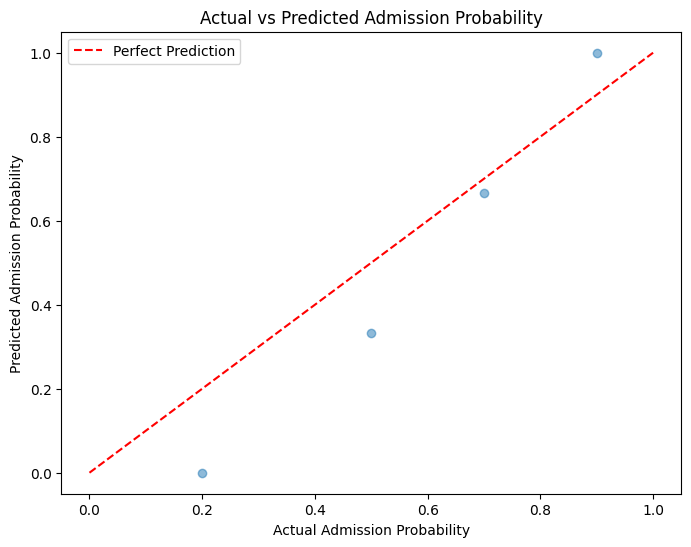

In [83]:
# Manual rescaling of predictions to match y_actual range
y_pred_rescaled = (y_pred_scaled - y_pred_scaled.min()) / (y_pred_scaled.max() - y_pred_scaled.min())

# Plotting
plt.figure(figsize=(8,6))
plt.scatter(y_actual, y_pred_rescaled, alpha=0.5)
plt.plot([0,1], [0,1], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Admission Probability")
plt.ylabel("Predicted Admission Probability")
plt.title("Actual vs Predicted Admission Probability")
plt.legend()
plt.show()


In [66]:
print("Actual min/max:", y_test.min(), y_test.max())
print("Predicted min/max:", y_pred.min(), y_pred.max())


Actual min/max: 2020 2026
Predicted min/max: 2022.5362553751634 2023.3557360812185


In [67]:
print(df.columns)


Index(['student_id', 'age', 'gender', 'category', 'state', 'preferred_stream',
       'entrance_exam', 'entrance_score', 'board_percentage',
       'extracurricular_score', 'admission_probability', 'admission_status',
       'scholarship_eligibility', 'college_name', 'city', 'year',
       'num_admissions'],
      dtype='object')


In [75]:
X = pd.get_dummies(X, drop_first=True)


In [76]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [77]:
print("Actual min/max:", y_test.min(), y_test.max())
print("Predicted min/max:", y_pred.min(), y_pred.max())


Actual min/max: 0.04199 0.7310099999999984
Predicted min/max: 2022.5362553751634 2023.3557360812185


In [73]:
model = RandomForestRegressor(
    n_estimators=50,        # ⬅️ reduce trees
    max_depth=10,           # ⬅️ limit depth
    min_samples_split=10,   # ⬅️ avoid overfitting
    random_state=42,
    n_jobs=-1               # ⬅️ use all CPU cores
)


In [74]:
X = df.drop(columns=[
    'student_id',
    'admission_probability',
    'admission_status',
    'scholarship_eligibility',
    'college_name',
    'city',
    'state',
    'year',
    'num_admissions'
])


In [71]:
drop_cols = [
    'student_id',
    'admission_probability',   # target
    'admission_status',        # label leakage
    'scholarship_eligibility', # leakage
    'college_name',
    'city',
    'year',
    'num_admissions'
]

In [ ]:
def build_features(df):
    df = df.copy()
    df["num_applications"] = 1
    X = df.drop(["student_id", "admission_probability"], axis=1)
    return X


In [ ]:
feature_importance = pd.Series(
    model.coef_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


board_percentage               0.178944
entrance_score                 0.144583
extracurricular_score          0.095778
preferred_stream_management    0.042302
state_tripura                  0.038171
entrance_exam_jee              0.028984
state_telangana                0.027371
state_jharkhand                0.025345
preferred_stream_commerce      0.024895
state_odisha                   0.024036
dtype: float64

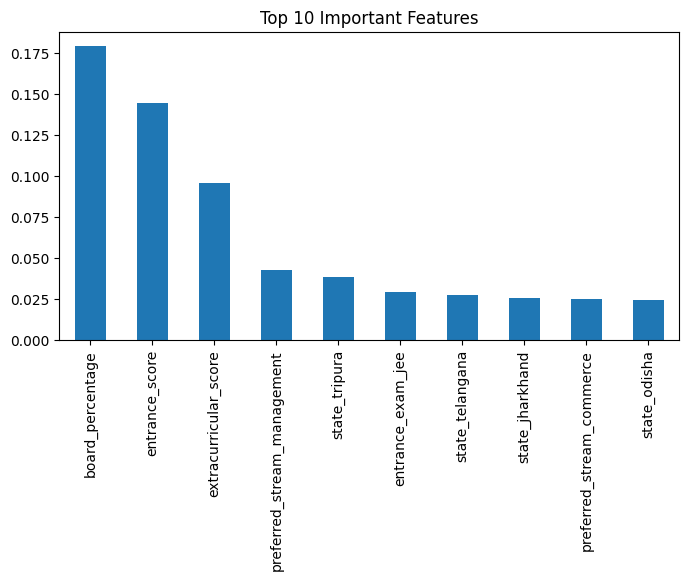

In [ ]:
feature_importance.head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Ensure year exists
df["year"] = df.get("year", np.random.randint(2020, 2027, size=len(df)))

# Each student = 1 admission
df["num_admissions"] = 1

agg_df = df.groupby(
    ["college_name", "preferred_stream", "year"]
).agg(
    num_admissions=("num_admissions", "sum"),
    avg_entrance_score=("entrance_score", "mean"),
    avg_board_percentage=("board_percentage", "mean"),
    avg_extracurricular=("extracurricular_score", "mean"),
    avg_admission_probability=("admission_probability", "mean"),
    total_applications=("student_id", "count")
).reset_index()


In [ ]:
X = agg_df.drop("num_admissions", axis=1)
y = agg_df["num_admissions"]

# One-hot encode categoricals
X = pd.get_dummies(
    X,
    columns=["college_name", "preferred_stream"],
    drop_first=True
)


In [ ]:
from sklearn.model_selection import train_test_split

X_train = X[X["year"] < 2026]
X_test  = X[X["year"] >= 2026]
y_train = y.loc[X_train.index]
y_test  = y.loc[X_test.index]


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")



RMSE: 0.01
R² Score: 0.997


In [ ]:
future_df = agg_df[["college_name", "preferred_stream"]].drop_duplicates()
future_df["year"] = 2027

future_df = future_df.merge(
    agg_df.groupby(["college_name", "preferred_stream"]).mean().reset_index(),
    on=["college_name", "preferred_stream"],
    how="left"
)

X_future = pd.get_dummies(
    future_df.drop("num_admissions", axis=1),
    columns=["college_name", "preferred_stream"],
    drop_first=True
)

X_future = X_future.reindex(columns=X.columns, fill_value=0)

future_df["predicted_admissions_2027"] = model.predict(X_future).round().astype(int)


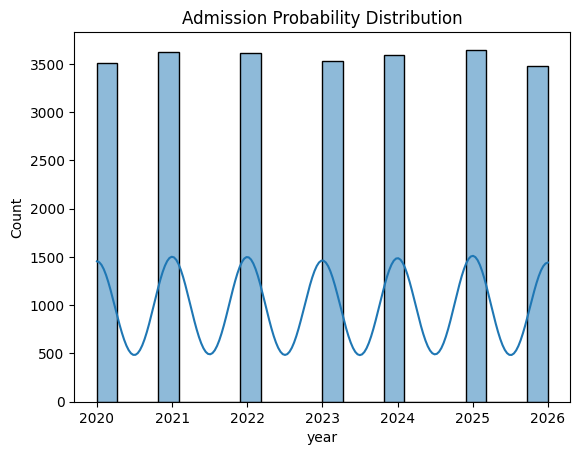

In [ ]:
sns.histplot(y, kde=True)
plt.title("Admission Probability Distribution")
plt.show()


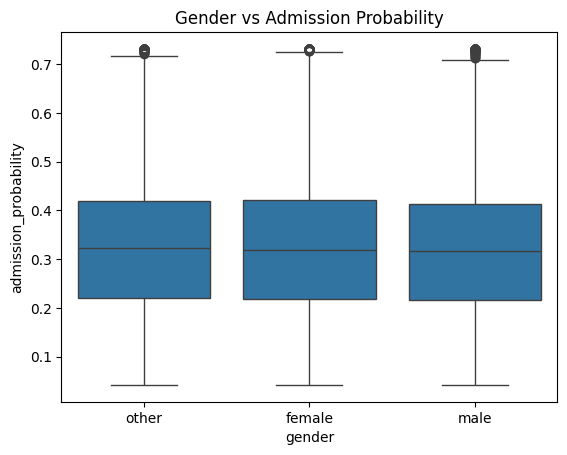

In [86]:
sns.boxplot(x='gender', y='admission_probability', data=df)
plt.title("Gender vs Admission Probability")
plt.show()


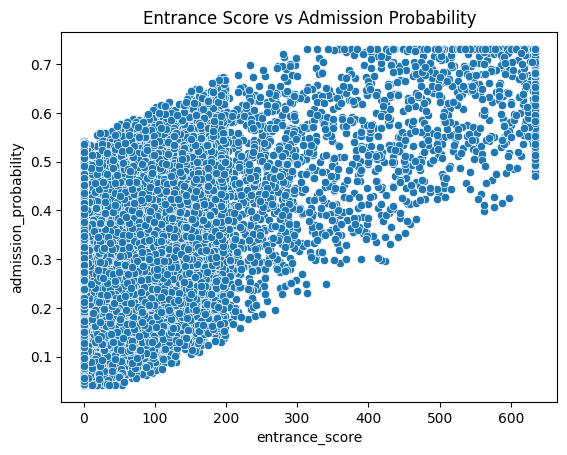

In [ ]:
sns.scatterplot(
    x='entrance_score',
    y='admission_probability',
    data=df
)
plt.title("Entrance Score vs Admission Probability")
plt.show()


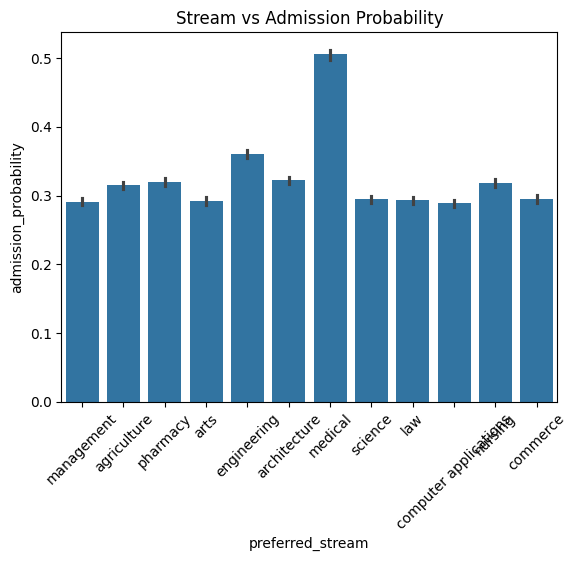

In [ ]:
sns.barplot(
    x='preferred_stream',
    y='admission_probability',
    data=df
)
plt.xticks(rotation=45)
plt.title("Stream vs Admission Probability")
plt.show()


In [ ]:
import pickle

with open("regression_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [ ]:
import os
os.getcwd()


'c:\\Users\\AADITI\\Downloads\\University_Admission_Prediction\\Notebooks'

In [ ]:
with open("regression_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)


In [ ]:
with open("models/regression_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [87]:
df.shape


(25000, 17)

In [88]:
df.size


425000